# **Course Project Chapter 3 House Prices**
_David da Paz (April 2018)_
___
1. Importing and cleaning the data
     - 1.1 Removing unnecessary data
     - 1.2 Handle missing values
     - 1.3 Removing duplicates
     - 1.4 Find and remove outliers
2. Encoding and feature engineering
     - 2.1 Adding "logSalePrice"
     - 2.2 Adding "total_surface" 
     - 2.3 Variables visualization
     - 2.4 Categorical variables
     - 2.5 Encoding
     - 2.6 Indicator variables
     - 2.7 Variable transformation
3. Simple model prediction
     - 3.1 Split the data
     - 3.2 Create
     - 3.3 Fit
     - 3.4 Predict
4. Intermediate model prediction
     - 4.1 Split the data
     - 4.2 Create
     - 4.3 Fit
     - 4.4 Predict
     - 4.5 Regularization (Ridge Regression)
     - 4.6 Tuning
5. Complex model prediction
     - 5.1 Split the data
     - 5.2 Create
     - 5.3 Fit
     - 5.4 Predict 
     - 5.5 Regularization (Ridge Regression)
     - 5.6 Tuning
6. Model evaluation
     - 6.1 RMSLE
     - 6.2 MAE
     - 6.3 MAE plot
7. Predictions
     - 7.1 Convert predictions
     - 7.2 Create dataframe
     - 7.3 Check distribution
     - 7.4 Save data

# 1. Importing and cleaning the data

## 1.1 Removing unnecessary data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data_df = pd.read_csv('house-prices.csv')
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [2]:
data_df.drop(['Order', 'PID'], axis=1, inplace = True)

## 1.2 Handle missing values

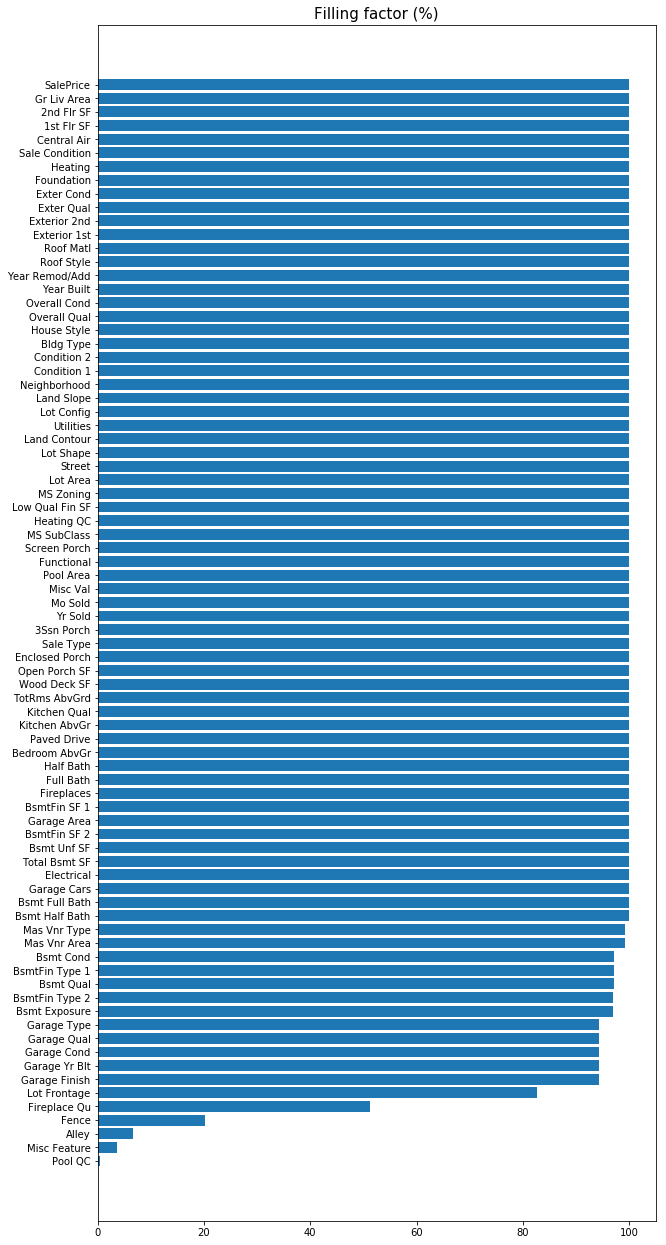

In [3]:
def filling_factor(data_df):
    missing_df = data_df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df['filling_factor'] = (data_df.shape[0]-missing_df['missing_count'])/data_df.shape[0]*100
    missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
    return missing_df
#____________________________________
missing_df = filling_factor(data_df)
missing_df[missing_df['filling_factor'] == 0]

col_filling = filling_factor(data_df)

y_axis  = list(col_filling['filling_factor'])
x_axis  = [i for i in range(len(col_filling))]
x_label = list(col_filling['column_name'])
fig = plt.figure(figsize=(10, 22))
plt.yticks(x_axis, x_label)
plt.title('Filling factor (%)', fontsize = 15)
plt.barh(x_axis, y_axis)
plt.show()

In [4]:
data_df['Pool QC'].fillna(value= 'NA', inplace=True)

data_df['Misc Feature'].fillna(value= 'NA', inplace=True)

data_df['Alley'].fillna(value= 'NA', inplace=True)

data_df['Fence'].fillna(value= 'NA', inplace=True)

data_df['Mas Vnr Type'].fillna(value= 'None', inplace=True)

data_df['Mas Vnr Area'].fillna(value= 0, inplace=True)

data_df['Fireplace Qu'].fillna(value= 'NA', inplace=True)

bas_features = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

for col in bas_features:
    data_df[col].fillna(value= 'NA', inplace=True)

    
bas_features2 = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

for col in bas_features:
    data_df[col].fillna(value= 0, inplace=True)
    
data_df['Lot Frontage'].describe()

data_df['Lot Frontage'].fillna(value = data_df['Lot Frontage'].mean(), inplace = True)

data_df['Garage Type'].fillna(value = 'NA', inplace = True)
data_df['Garage Cond'].fillna(value = 'NA', inplace = True)
data_df['Garage Qual'].fillna(value = 'NA', inplace = True)
data_df['Garage Finish'].fillna(value = 'NA', inplace = True)
data_df['Garage Yr Blt'].fillna(value = 0, inplace = True)
data_df['Garage Cars'].fillna(value = 0, inplace = True)
data_df['Garage Area'].fillna(value = 0, inplace = True)

data_df['Bsmt Full Bath'].fillna(value = 0, inplace = True)
data_df['Bsmt Half Bath'].fillna(value = 0, inplace = True)

data_df['Electrical'].value_counts()

data_df['Electrical'].fillna(value = 'SBrkr', inplace = True)

data_df['Total Bsmt SF'].fillna(value = 0, inplace = True)
data_df['Bsmt Unf SF'].fillna(value = 0, inplace = True)
data_df['BsmtFin SF 2'].fillna(value = 0, inplace = True)
data_df['BsmtFin SF 1'].fillna(value = 0, inplace = True)



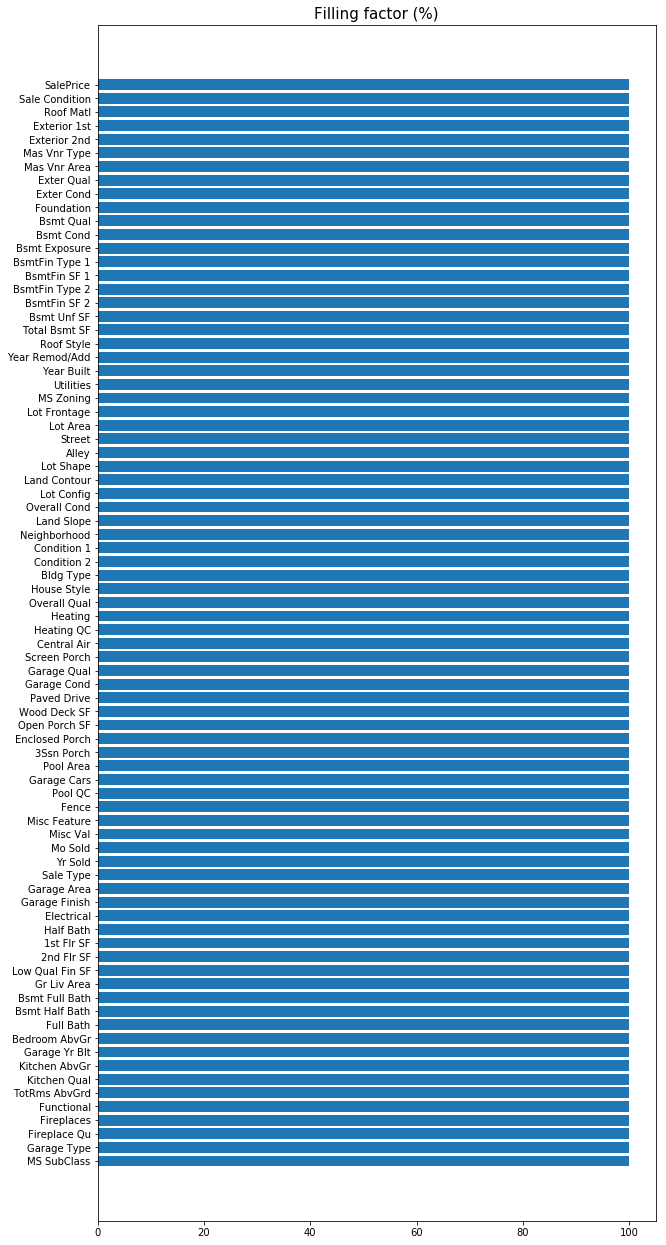

In [5]:
col_filling = filling_factor(data_df)

# plotting the data
y_axis  = list(col_filling['filling_factor'])
x_axis  = [i for i in range(len(col_filling))]
x_label = list(col_filling['column_name'])
fig = plt.figure(figsize=(10, 22))
plt.yticks(x_axis, x_label)
plt.title('Filling factor (%)', fontsize = 15)
#plt.axvline(x=95, linewidth=2, color = 'r')
plt.barh(x_axis, y_axis)
plt.show()

In [6]:
data_df.isnull().sum().sum()

0

## 1.3 Removing duplicates

In [7]:
data_df.loc[data_df.duplicated(),:]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


## 1.4 Find and remove outliers

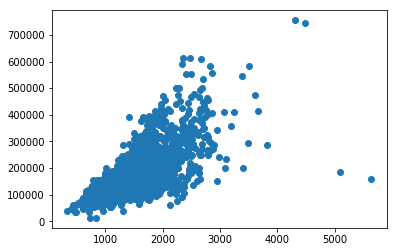

In [8]:
# GrLivArea (Above grade (ground) living area square feet)
plt.scatter(data_df['Gr Liv Area'].values, data_df['SalePrice'].values)
plt.show()

In [9]:
# We can see 100% outliers in the bottom right corner - I'll delete it
data_df = data_df.drop(data_df[(data_df['Gr Liv Area'] > 4000) & (data_df['SalePrice'] < 300000)].index)

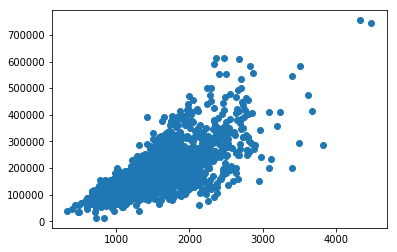

In [10]:
# GrLivArea (Above grade (ground) living area square feet)
plt.scatter(data_df['Gr Liv Area'].values, data_df['SalePrice'].values)
plt.show()

# 2. Encoding and feature engineering

## 2.1 Adding "logSalePrice"

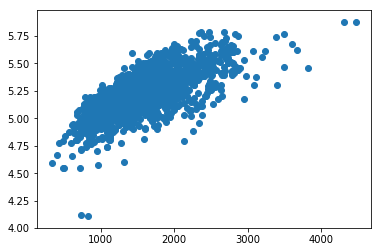

In [11]:
# Add a LogSalePrice variable to the DataFrame
data_df['LogSalePrice'] = np.log10(data_df['SalePrice'])

# GrLivArea (Above grade (ground) living area square feet)
plt.scatter(data_df['Gr Liv Area'].values, data_df['LogSalePrice'].values)
plt.show()

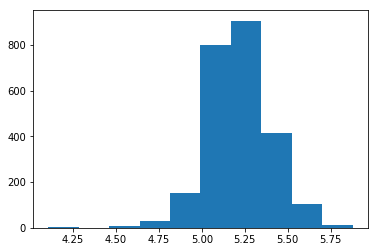

In [12]:
plt.hist(data_df['LogSalePrice'])
plt.show()

## 2.2 Adding "total_surface"

In [13]:
data_df['total_surface'] = data_df['Total Bsmt SF'] + data_df['Gr Liv Area']

In [14]:
data_df.dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
                   ...   
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type        object
Garage Yr Blt     float64
Garage Finis

## 2.3 Variables visualization

In [15]:
print('Data from years {} to {}.'.format(data_df['Yr Sold'].min(), data_df['Yr Sold'].max()))

Data from years 2006 to 2010.


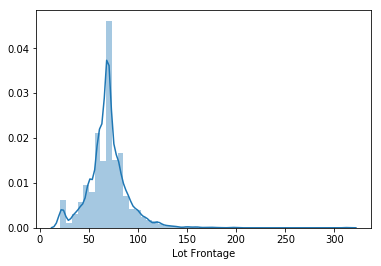

In [16]:
sns.distplot(data_df['Lot Frontage'])

## 2.4 Categorical variables

In [17]:
data_df[['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition']] = data_df[['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition']].apply(pd.Categorical)

In [18]:
data_df['Exter Qual'] = pd.Categorical(data_df['Exter Qual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
data_df['Exter Cond'] = pd.Categorical(data_df['Exter Cond'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
data_df['Bsmt Qual'] = pd.Categorical(data_df['Bsmt Qual'], ordered=True, categories=['No basement','Fa','TA','Gd','Ex'])
data_df['Bsmt Cond'] = pd.Categorical(data_df['Bsmt Cond'], ordered=True, categories=['No basement','Po','Fa','TA','Gd'])
data_df['Heating QC'] = pd.Categorical(data_df['Heating QC'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
data_df['Kitchen Qual'] = pd.Categorical(data_df['Kitchen Qual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
data_df['Fireplace Qu'] = pd.Categorical(data_df['Fireplace Qu'], ordered=True, categories=['No fireplace','Po','Fa','TA','Gd','Ex'])
data_df['Garage Qual'] = pd.Categorical(data_df['Garage Qual'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
data_df['Garage Cond'] = pd.Categorical(data_df['Garage Cond'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
data_df['Pool QC'] = pd.Categorical(data_df['Pool QC'], ordered=True, categories=['No pool','Fa','Gd','Ex'])

In [19]:
colums_to_encode = ['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Fireplace Qu','Garage Qual',
                                 'Garage Cond','Pool QC']

In [20]:
columns_prefix =['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Fireplace Qu','Garage Qual',
                                 'Garage Cond','Pool QC']

## 2.5 Encoding

In [21]:
encoded_df = pd.get_dummies(data_df, columns=colums_to_encode, prefix=columns_prefix)

In [22]:
encoded_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Cond_No garage,Garage Cond_Po,Garage Cond_Fa,Garage Cond_TA,Garage Cond_Gd,Garage Cond_Ex,Pool QC_No pool,Pool QC_Fa,Pool QC_Gd,Pool QC_Ex
0,69.20199,8795,7,5,2000,2000,0.0,300.0,0.0,652.0,...,0,0,0,1,0,0,0,0,0,0
1,75.00000,10170,6,6,1951,1951,522.0,0.0,0.0,216.0,...,0,0,0,1,0,0,0,0,0,0
2,21.00000,2001,4,5,1970,1970,80.0,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,0,0
3,70.00000,10552,5,5,1959,1959,0.0,1018.0,0.0,380.0,...,0,0,0,1,0,0,0,0,0,0
4,60.00000,10120,7,4,1910,1950,0.0,0.0,0.0,925.0,...,0,0,0,1,0,0,0,0,0,0


## 2.6 Indicator variables

## 2.7 Variable transformation

# 3. Simple model prediction

## 3.1 Split the data

In [ ]:
df = encoded_df[['LogSalePrice','total_surface','condition_Abnorml','condition_AdjLand','condition_Alloca',
                'condition_Family','condition_Normal','condition_Partial']]

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
train_df, test_df = train_test_split(df, train_size=0.5, test_size=0.5, random_state=0)

print('Train DataFrame:', train_df.shape)
print('Test DataFrame:', test_df.shape)

## 3.2 Create

In [ ]:
# Create X/y variables
X_tr = train_df.drop('LogSalePrice', axis=1).values
y_tr = train_df['LogSalePrice'].values

X_te = test_df.drop('LogSalePrice', axis=1).values
y_te = test_df['LogSalePrice'].values

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression
lr = LinearRegression()

## 3.3 Fit

In [ ]:
# Fit it to train data
lr.fit(X_tr, y_tr)

# Print coefficients
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

## 3.4 Predict

In [ ]:
# Compute predictions
y_pred = lr.predict(X_te)

# 4. Intermediate model prediction

## 4.1 Split the data

## 4.2 Create

## 4.3 Fit

## 4.4 Predict

## 4.5 Regularization (Ridge Regression)

## 4.6 Tuning

# 5. Complex model prediction

## 5.1 Split the data

## 5.2 Create

## 5.3 Fit

## 5.4 Predict

## 5.5 Regularization (Ridge Regression)

## 5.6 Tuning

# 6. Model evaluation

## 6.1 RMSLE

In [ ]:
# Root Mean Square Error (RMSE)
def RMSE(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [ ]:
# Mean baseline
rmse_baseline = RMSE(y_te, np.mean(y_te))

In [ ]:
# Linear regression
rmse_lr = RMSE(y_te, y_pred)

In [ ]:
print('RMSE baseline: {:.3f}'.format(rmse_baseline))
print('RMSE linear regression: {:.3f}'.format(rmse_lr))

## 6.2 MAE

In [ ]:
# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [ ]:
# Mean baseline
mae_baseline = MAE(y_te, np.mean(y_te))

In [ ]:
# Linear regression
mae_lr = MAE(y_te, y_pred)

In [ ]:
print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))

## 6.3 MAE plot

In [ ]:
# Final comparison
mae_values = [mae_baseline, mae_lr]
titles = ['mean', 'lr']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel('MAE')
plt.show()

# 7. Predictions

## 7.1 Convert predictions

## 7.2 Create dataframe

## 7.3 Check distribution

## 7.4 Save data